In [1]:
%pip install torch onnx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from ultralytics import YOLO

# Load your standard YOLOv8 model (not YOLOWorld)
model = YOLO("yolov8s-worldv2.pt")  # You can use "yolov8s.pt" and retrain it with your data

# Export to ONNX
model.export(format="onnx")


Ultralytics YOLOv8.2.30  Python-3.10.2 torch-2.2.0+cpu CPU (Intel Core(TM) i5-6300U 2.40GHz)
WARNING  YOLOWorld (original version) export is not supported to any format.
WARNING  YOLOWorldv2 models (i.e. 'yolov8s-worldv2.pt') only support export to (torchscript, onnx, openvino, engine, coreml) formats. See https://docs.ultralytics.com/models/yolo-world for details.
YOLOv8s-worldv2 summary (fused): 195 layers, 12749288 parameters, 0 gradients, 50.8 GFLOPs

PyTorch: starting from 'yolov8s-worldv2.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (24.7 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success  6.5s, saved as 'yolov8s-worldv2.onnx' (49.9 MB)

Export complete (13.5s)
Results saved to C:\COMPUTER_DATA\kiran's\Binary_SoftSolutions\Yolo_World\Object_Detection_with_Yolo_world
Predict:         yolo predict task=detect model=yolov8s-worldv2.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8s-worldv2.onnx imgsz=640 dat

'yolov8s-worldv2.onnx'

In [3]:
%pip install onnxruntime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


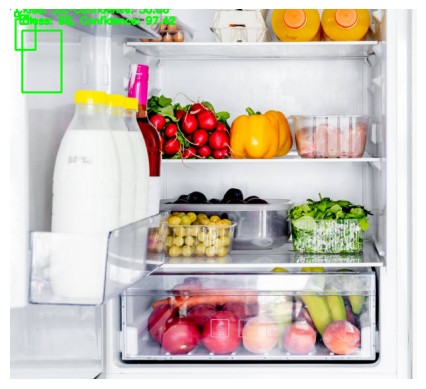

In [5]:
import onnxruntime as ort
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the ONNX model
model_path = "yolov8s-worldv2.onnx"
session = ort.InferenceSession(model_path)

# Preprocess the image
image_path = 'image1.jpg'
image = cv2.imread(image_path)
input_shape = (640, 640)  # Standard input size for YOLOv8 models

# Resize and normalize the image
resized_image = cv2.resize(image, input_shape)
normalized_image = resized_image / 255.0  # Normalize to [0, 1] range
input_tensor = np.transpose(normalized_image, (2, 0, 1)).astype(np.float32)  # Convert to CHW format
input_tensor = np.expand_dims(input_tensor, axis=0)  # Add batch dimension (NCHW format)

# Run inference
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name
outputs = session.run([output_name], {input_name: input_tensor})[0]

# Post-process the results
# Assuming the output has the format [batch_size, num_detections, 6] (x, y, w, h, confidence, class_id)
# Adjust the indexing if your model output format is different
boxes = outputs[0, :, :4]  # Extract the bounding box coordinates
confidences = outputs[0, :, 4]  # Extract confidence scores
class_ids = outputs[0, :, 5]  # Extract class IDs

# Draw bounding boxes and labels on the image
for box, confidence, class_id in zip(boxes, confidences, class_ids):
    x, y, w, h = box
    start_point = (int(x.item()), int(y.item()))  # Convert to int using .item()
    end_point = (int((x + w).item()), int((y + h).item()))
    color = (0, 255, 0)  # Green color for bounding box
    cv2.rectangle(image, start_point, end_point, color, 2)
    label = f"Class: {int(class_id.item())}, Confidence: {confidence:.2f}"
    cv2.putText(image, label, (int(x.item()), int(y.item()) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
plt.axis('off')  # Hide axis
plt.show()


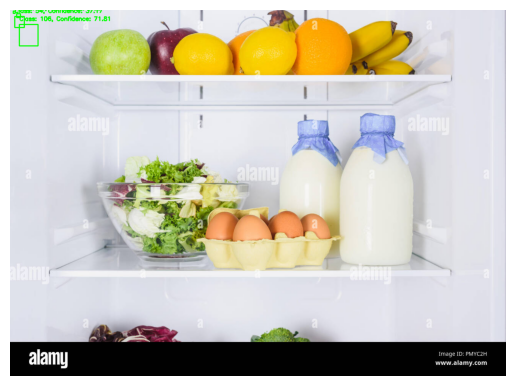

In [6]:
import onnxruntime as ort
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the ONNX model
model_path = "yolov8s-worldv2.onnx"
session = ort.InferenceSession(model_path)

# Preprocess the image
image_path = 'image2.jpg'
image = cv2.imread(image_path)
input_shape = (640, 640)  # Standard input size for YOLOv8 models

# Resize and normalize the image
resized_image = cv2.resize(image, input_shape)
normalized_image = resized_image / 255.0  # Normalize to [0, 1] range
input_tensor = np.transpose(normalized_image, (2, 0, 1)).astype(np.float32)  # Convert to CHW format
input_tensor = np.expand_dims(input_tensor, axis=0)  # Add batch dimension (NCHW format)

# Run inference
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name
outputs = session.run([output_name], {input_name: input_tensor})[0]

# Post-process the results
# Assuming the output has the format [batch_size, num_detections, 6] (x, y, w, h, confidence, class_id)
# Adjust the indexing if your model output format is different
boxes = outputs[0, :, :4]  # Extract the bounding box coordinates
confidences = outputs[0, :, 4]  # Extract confidence scores
class_ids = outputs[0, :, 5]  # Extract class IDs

# Draw bounding boxes and labels on the image
for box, confidence, class_id in zip(boxes, confidences, class_ids):
    x, y, w, h = box
    start_point = (int(x.item()), int(y.item()))  # Convert to int using .item()
    end_point = (int((x + w).item()), int((y + h).item()))
    color = (0, 255, 0)  # Green color for bounding box
    cv2.rectangle(image, start_point, end_point, color, 2)
    label = f"Class: {int(class_id.item())}, Confidence: {confidence:.2f}"
    cv2.putText(image, label, (int(x.item()), int(y.item()) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
plt.axis('off')  # Hide axis
plt.show()


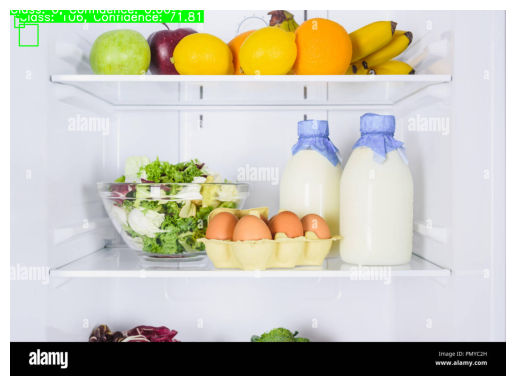

In [7]:
import onnxruntime as ort
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the ONNX model
model_path = "yolov8s-worldv2.onnx"
session = ort.InferenceSession(model_path)

# Preprocess the image
image_path = 'image2.jpg'
image = cv2.imread(image_path)
input_shape = (640, 640)  # Standard input size for YOLOv8 models

# Resize and normalize the image
resized_image = cv2.resize(image, input_shape)
normalized_image = resized_image / 255.0  # Normalize to [0, 1] range
input_tensor = np.transpose(normalized_image, (2, 0, 1)).astype(np.float32)  # Convert to CHW format
input_tensor = np.expand_dims(input_tensor, axis=0)  # Add batch dimension (NCHW format)

# Run inference
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name
outputs = session.run([output_name], {input_name: input_tensor})[0]

# Post-process the results
# Assuming the output has the format [batch_size, num_detections, 6] (x, y, w, h, confidence, class_id)
boxes = outputs[0, :, :4]  # Extract the bounding box coordinates
confidences = outputs[0, :, 4]  # Extract confidence scores
class_ids = outputs[0, :, 5]  # Extract class IDs

# Draw bounding boxes and labels on the image
for box, confidence, class_id in zip(boxes, confidences, class_ids):
    x, y, w, h = box
    start_point = (int(x.item()), int(y.item()))  # Convert to int using .item()
    end_point = (int((x + w).item()), int((y + h).item()))
    color = (0, 255, 0)  # Green color for bounding box
    cv2.rectangle(image, start_point, end_point, color, 2)
    
    # Larger text settings
    font_scale = 1.0  # Increase the font size
    thickness = 2  # Increase the thickness of the text
    label = f"Class: {int(class_id.item())}, Confidence: {confidence:.2f}"
    text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
    text_x = int(x.item())
    text_y = int(y.item()) - 10
    
    # Ensure the label doesn't go out of bounds
    if text_y < 0:
        text_y = 10
    
    # Draw the label with background rectangle for readability
    cv2.rectangle(image, (text_x, text_y - text_size[1] - 5), (text_x + text_size[0], text_y + 5), color, -1)
    cv2.putText(image, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
plt.axis('off')  # Hide axis
plt.show()


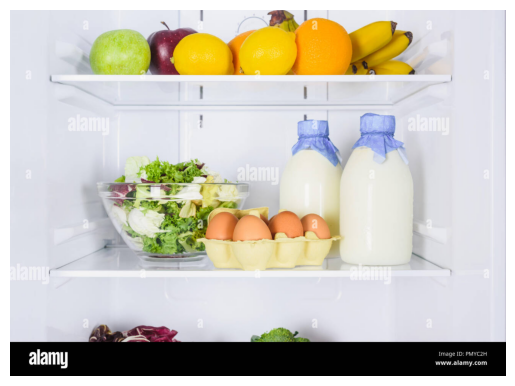

In [8]:
import onnxruntime as ort
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the ONNX model
model_path = "yolov8s-worldv2.onnx"
session = ort.InferenceSession(model_path)

# Preprocess the image
image_path = 'image2.jpg'
image = cv2.imread(image_path)
input_shape = (640, 640)  # Standard input size for YOLOv8 models

# Resize and normalize the image
resized_image = cv2.resize(image, input_shape)
normalized_image = resized_image / 255.0  # Normalize to [0, 1] range
input_tensor = np.transpose(normalized_image, (2, 0, 1)).astype(np.float32)  # Convert to CHW format
input_tensor = np.expand_dims(input_tensor, axis=0)  # Add batch dimension (NCHW format)

# Run inference
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name
outputs = session.run([output_name], {input_name: input_tensor})[0]

# Post-process the results
# YOLO models output bounding boxes in the format (x_center, y_center, width, height)
boxes = outputs[0, :, :4]  # Extract bounding box coordinates
confidences = outputs[0, :, 4]  # Extract confidence scores
class_ids = outputs[0, :, 5]  # Extract class IDs

# Convert the bounding box coordinates from (x_center, y_center, width, height) to (x1, y1, x2, y2)
image_height, image_width = image.shape[:2]
boxes[:, 0] = boxes[:, 0] * image_width  # x_center to x1
boxes[:, 1] = boxes[:, 1] * image_height  # y_center to y1
boxes[:, 2] = boxes[:, 2] * image_width  # width
boxes[:, 3] = boxes[:, 3] * image_height  # height

# Convert from (x_center, y_center, width, height) to (x1, y1, x2, y2)
boxes[:, 0] = boxes[:, 0] - boxes[:, 2] / 2  # x1
boxes[:, 1] = boxes[:, 1] - boxes[:, 3] / 2  # y1
boxes[:, 2] = boxes[:, 0] + boxes[:, 2]  # x2
boxes[:, 3] = boxes[:, 1] + boxes[:, 3]  # y2

# Filter out low-confidence detections
confidence_threshold = 0.5
indices = np.where(confidences > confidence_threshold)

# Draw bounding boxes and labels on the image
for i in indices[0]:
    x1, y1, x2, y2 = boxes[i].astype(int)
    class_id = int(class_ids[i])
    confidence = confidences[i]
    color = (0, 255, 0)  # Green color for bounding box

    # Draw the bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

    # Prepare the label text
    font_scale = 1.0  # Increase the font size
    thickness = 2  # Increase the thickness of the text
    label = f"Class: {class_id}, Confidence: {confidence:.2f}"
    text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
    text_x, text_y = x1, y1 - 10
    
    # Ensure the label doesn't go out of bounds
    if text_y < 0:
        text_y = y1 + 10
    
    # Draw the label with background rectangle for readability
    cv2.rectangle(image, (text_x, text_y - text_size[1] - 5), (text_x + text_size[0], text_y + 5), color, -1)
    cv2.putText(image, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
plt.axis('off')  # Hide axis
plt.show()


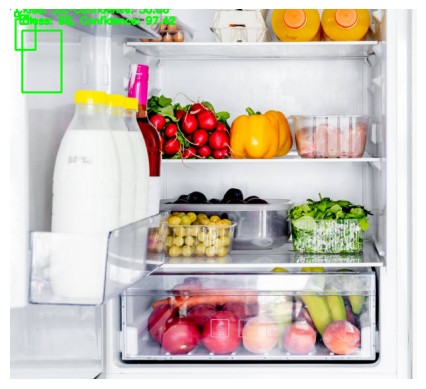

In [11]:
import onnxruntime as ort
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the ONNX model
model_path = "yolov8s-worldv2.onnx"
session = ort.InferenceSession(model_path)

# Preprocess the image
image_path = 'image1.jpg'
image = cv2.imread(image_path)
input_shape = (640, 640)  # Standard input size for YOLOv8 models

# Resize and normalize the image
resized_image = cv2.resize(image, input_shape)
normalized_image = resized_image / 255.0  # Normalize to [0, 1] range
input_tensor = np.transpose(normalized_image, (2, 0, 1)).astype(np.float32)  # Convert to CHW format
input_tensor = np.expand_dims(input_tensor, axis=0)  # Add batch dimension (NCHW format)

# Run inference
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name
outputs = session.run([output_name], {input_name: input_tensor})[0]

# Post-process the results
# Assuming the output has the format [batch_size, num_detections, 6] (x, y, w, h, confidence, class_id)
# Adjust the indexing if your model output format is different
boxes = outputs[0, :, :4]  # Extract the bounding box coordinates
confidences = outputs[0, :, 4]  # Extract confidence scores
class_ids = outputs[0, :, 5]  # Extract class IDs

# Draw bounding boxes and labels on the image
for box, confidence, class_id in zip(boxes, confidences, class_ids):
    x, y, w, h = box
    start_point = (int(x.item()), int(y.item()))  # Convert to int using .item()
    end_point = (int((x + w).item()), int((y + h).item()))
    color = (0, 255, 0)  # Green color for bounding box
    cv2.rectangle(image, start_point, end_point, color, 2)
    label = f"Class: {int(class_id.item())}, Confidence: {confidence:.2f}"
    cv2.putText(image, label, (int(x.item()), int(y.item()) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
plt.axis('off')  # Hide axis
plt.show()
